# Наша первая свёрточная нейросеть 

Пришло время построить нашу первую свёрточную нейросеть. Будем использовать для этого датасет [fashion MNIST.](https://www.cs.toronto.edu/~kriz/cifar.html) 

<img src="https://pbs.twimg.com/media/DVhOyJ1XkAACKqT.jpg" style="width:70%">

In [1]:
import tensorflow as tf
tf.__version__ 

'2.2.0'

In [2]:
from tensorflow.keras import Sequential
keras, L = tf.keras, tf.keras.layers

import numpy as np
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Смотрим на данные 

Скачаеми приготовим данные. Буквально через минуту в наших руках окажутся $60 000$ картинок размера $28 \times 28$.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Отнормировали данные к отрезку [0;1]
X_train = X_train/ 255.
X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# размерность картинки - 28х28х1, 1-канал
print("Train samples:", X_train.shape, y_train.shape)
print("Test samples:", X_test.shape, y_test.shape)

Train samples: (60000, 28, 28) (60000,)
Test samples: (10000, 28, 28) (10000,)


Нарисуем несколько рандомных картинок из тренировочной выборки. 

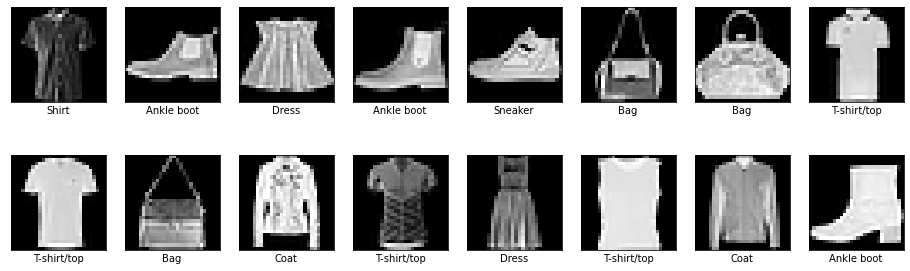

In [5]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

## 2.  Выбираем для нашей нейросети архитектуру

Свёрточная нейронная сеть строится из нескольких разных типов слоёв: 

* [Conv2D](https://keras.io/layers/convolutional/#conv2d) - Конволюция:
    - **filters**: число выходных каналов; 
    - **kernel_size**: размер окна для свёртки;
    - **padding**: padding="same" добавляет нулевую каёмку по краям картинки, чтбы после свёртки размеры картинки не изменялись; padding='valid' ничего не добавляет;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: размер входа
* [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - макспулинг
* [Flatten](https://keras.io/layers/core/#flatten) - разворачивает картинку в вектор 
* [Dense](https://keras.io/layers/core/#dense) - полносвязный слой (fully-connected layer)
* [Activation](https://keras.io/layers/core/#activation) - функция активации
* [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - leaky relu активация
* [Dropout](https://keras.io/layers/core/#dropout) - дропаут.


В модели, которую мы определим ниже, на вход будет идти тензоры размера __(None, 28, 28, 1)__ и __(None, 10)__. На выходе мы будем получать вероятноть того, что объект относится к конкретному классу. Разменость __None__ заготовлена для размерности батча. 

## 2.1 Полносвязная сетка 

Соберём полносвязную сетку с нашей предыдущей пары/ 

In [6]:
tf.random.set_seed(42)

model_1 = Sequential( )

model_1.add(L.Flatten(input_shape=(28, 28)))

model_1.add(L.Dense(64))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(32))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(16))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(10, activation='softmax'))

model_1.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

hist = model_1.fit(X_train, y_train, validation_split= 0.2,
                        batch_size=500, epochs=20, verbose=1)

Epoch 1/20
96/96 [==============================] - 1s 6ms/step - loss: 1.2307 - sparse_categorical_accuracy: 0.7029 - val_loss: 1.2345 - val_sparse_categorical_accuracy: 0.8022
Epoch 2/20
96/96 [==============================] - 0s 4ms/step - loss: 0.6526 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.7161 - val_sparse_categorical_accuracy: 0.8402
Epoch 3/20
96/96 [==============================] - 0s 4ms/step - loss: 0.4662 - sparse_categorical_accuracy: 0.8671 - val_loss: 0.5034 - val_sparse_categorical_accuracy: 0.8470
Epoch 4/20
96/96 [==============================] - 0s 4ms/step - loss: 0.3888 - sparse_categorical_accuracy: 0.8787 - val_loss: 0.4525 - val_sparse_categorical_accuracy: 0.8465
Epoch 5/20
96/96 [==============================] - 0s 4ms/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.4469 - val_sparse_categorical_accuracy: 0.8462
Epoch 6/20
96/96 [==============================] - 0s 4ms/step - loss: 0.3192 - sparse_categorical_accuracy: 

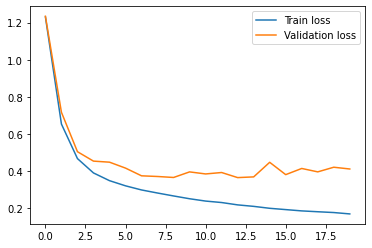

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

In [8]:
print("\nLoss, Accuracy = ", model_1.evaluate(X_test, y_test, verbose=0))


Loss, Accuracy =  [0.4491325318813324, 0.8578000068664551]


* Посмотрите на качество получившейся модели. Вернитесь по коду вверх и раскоментируйте строки, где картинки нормируются к отрезку $[0;1]$. Переобучите сетку. Что произошло с качеством? 
* Теперь попробуйте использовать в качестве функции активации линейную функцию. Что произошло с качеством модели?  

Можно посмотреть, где именно сетка ошибается. 

In [9]:
y_pred = model_1.predict_classes(X_test)
errors =  y_pred != y_test

# срежем только наблюдения, где была ошибка вместе с метками
X_err = X_test[errors]
y_err = y_test[errors]
y_pred = y_pred[errors]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


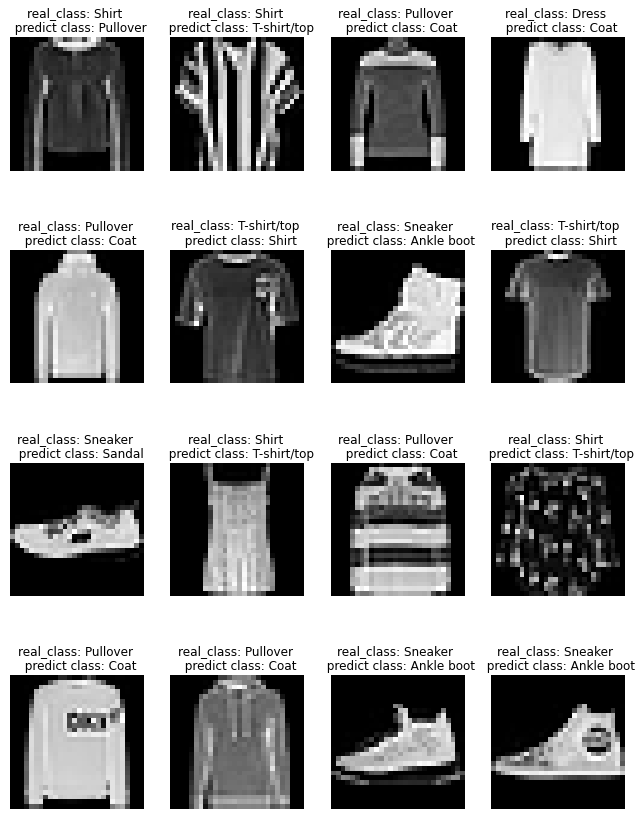

In [10]:
cols = 4
rows = 4
fig = plt.figure(figsize=(3 * cols - 1, 4 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_err))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_err[random_index, : ], cmap='gray')
        ax.set_title('real_class: {} \n  predict class: {}'.format(class_names[y_err[random_index]], 
                                                                   class_names[y_pred[random_index]]))
plt.show()

## 2.2 Свёрточная сетка 

Во-первых, нужно в явном виде указать, что у нас в изображениях один канал. Иначе питон будет ругаться.

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train[:,:,:,np.newaxis].shape

(60000, 28, 28, 1)

In [12]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

Теперь давайте соберём свёртоную сеть: 

* Свёртка с ядром $5 \times 5$, same padding и $32$ каналами
* ReLU
* Макспулинг размера $2 \times 2$
* Свёртка с ядром $5 \times 5$ и $16$ каналами  и same padding
* ReLU
* Макспулинг размера $2 \times 2$ с шагом (strides) $2$ по обеим осям 
* Дальше сделайте `Flatten` и сделайте два полносвязных слоя с ReLU и $120$ и $60$ нейронами

In [13]:
tf.random.set_seed(42)

model_1 = Sequential( )

model_1.add(L.Input((28,28,1)))

model_1.add(L.Conv2D(32,kernel_size=(5,5), activation='relu'))
model_1.add(L.MaxPooling2D(pool_size=(2,2))) 
model_1.add(L.Conv2D(16,kernel_size=(5,5), activation='relu', padding='same'))
model_1.add(L.MaxPooling2D(pool_size=(2,2),strides=(2,2))) 
model_1.add(L.Flatten())
model_1.add(L.Dense(120))
model_1.add(L.Dense(60))
model_1.add(L.Dense(10, activation='softmax'))

model_1.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

hist = model_1.fit(X_train, y_train, validation_split= 0.2,
                        batch_size=500, epochs=20, verbose=1)


Epoch 1/20
96/96 [==============================] - 15s 153ms/step - loss: 0.7889 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5414 - val_sparse_categorical_accuracy: 0.7966
Epoch 2/20
96/96 [==============================] - 14s 144ms/step - loss: 0.4647 - sparse_categorical_accuracy: 0.8328 - val_loss: 0.4445 - val_sparse_categorical_accuracy: 0.8364
Epoch 3/20
96/96 [==============================] - 16s 170ms/step - loss: 0.4011 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3950 - val_sparse_categorical_accuracy: 0.8591
Epoch 4/20
96/96 [==============================] - 17s 178ms/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8685 - val_loss: 0.3658 - val_sparse_categorical_accuracy: 0.8729
Epoch 5/20
96/96 [==============================] - 15s 153ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3435 - val_sparse_categorical_accuracy: 0.8798
Epoch 6/20
96/96 [==============================] - 15s 159ms/step - loss: 0.3226 - sparse_cate

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_5 (Dense)              (None, 60)               

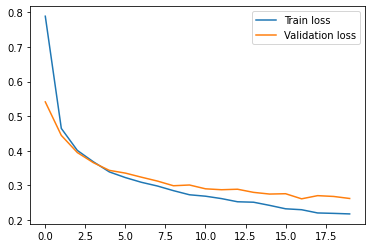

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

In [16]:
print("\nLoss, Accuracy = ", model_1.evaluate(X_test, y_test, verbose=0))


Loss, Accuracy =  [0.28487294912338257, 0.9014999866485596]


Как видите, точность довольно сильно подскочила. Попробуйте поиграться числом параметров и слоёв так, чтобы их стало меньше, а качество сетки стало лучше. Попробуйте обучать нейросетку большее количество эпох. 

Снова посмотрим на ошибки. 

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
np.squeeze(X_test, axis=3).shape

(10000, 28, 28)

In [20]:
y_pred = model_1.predict_classes(X_test)
errors =  y_pred != y_test

X_err = np.squeeze(X_test[errors], axis=3)
y_err = y_test[errors]
y_pred = y_pred[errors]

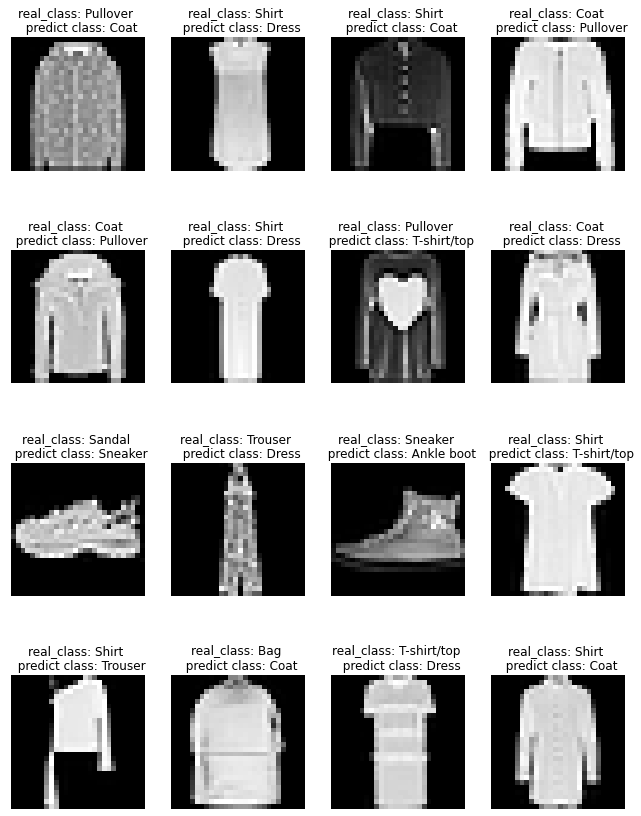

In [21]:
cols = 4
rows = 4
fig = plt.figure(figsize=(3 * cols - 1, 4 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_err))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_err[random_index, : ], cmap='gray')
        ax.set_title('real_class: {} \n  predict class: {}'.format(class_names[y_err[random_index]], 
                                                                   class_names[y_pred[random_index]]))
plt.show()

Вот так, кстати говоря, выглядят ошибки аналогичной неронки на MNIST. Кстати говоря, чтобы посмотреть как именно код работает на этом датасете, достаточно просто поменять первые строки с подгрузкой данных в тетрадку. 


![ ](https://raw.githubusercontent.com/FUlyankin/neural_nets_econ/master/2019/sem_6_pic/MNIST_error.png)

## 3  Data augmentation

Попробуем обучить ту же модель, но искуственно расширяя набор данных за счёт [случайных искажений.](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* `rotation_range`  значение в градусах (0-180), диапазон, в пределах которого произвольно вращаются изображения;
* `width_shift` и `height_shift` это диапазоны (в долях от общей ширины или высоты), в пределах которых можно произвольно переводить изображения по вертикали или горизонтали;
* `shear_range` диапазон для рандомных сдвигов
* `zoom_range` для случайного масштабирования внутри фотографий
* `horizontal_flip` для переворачивания половины изображения по горизонтали
* `fill_mode` стратегия для заполнения вновь появившихся пикселей

In [23]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
        )

In [24]:
datagen.fit(X_train) # обучили генератор 

Если обучить нейронку с использованием этих настроек, она никогда не увидит одно и то же изображение дважды. Однако входные данные по-прежнему будут довольно сильно связаны между собой. Мы пытаемся исказить уже существующие объекты так, чтобы они всё ещё оставались собой, но нейронка не выучивала детали, присущие конкретным наблюдениям, то есть __не переобучалась.__ 

In [28]:
X_train[200].shape

(28, 28, 1)

In [31]:
# Настраиваем поток данных 
# Возьмём одну картинку (под номером 200) 10 раз и подадим её на вход

it = datagen.flow(np.array(10*[X_train[200]]), np.array(10*[y_train[200]]), batch_size=10) # итератор 

images, categories = it.next()
print("Number of images returned by iterator:", len(images))

Number of images returned by iterator: 10


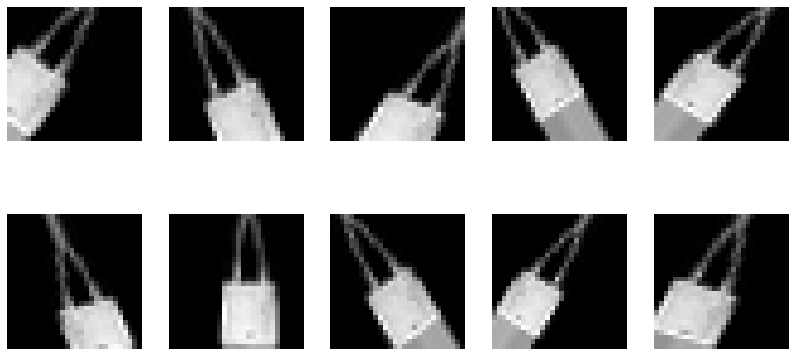

In [32]:
cols = 5
rows = 2
k = 0

fig = plt.figure(figsize=(3 * cols - 1, 4 * rows - 1))
for i in range(cols):
    for j in range(rows):
        im = np.squeeze(images[k], axis=2)
        k += 1
        
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(im, cmap='gray')

plt.show()

Настроим поток для всей выборки. Каждая картинка будет искажаться один раз и подаваться на вход в нейронку. 

In [33]:
# Кусочек откусываем для валидации
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)

it = datagen.flow(X_tr, y_tr, batch_size=256)

Скопируем сетку из предыдущего пункта. 

In [34]:
tf.random.set_seed(42)

model_3 = Sequential( )

model_3.add(L.Input((28,28,1)))

model_3.add(L.Conv2D(32,kernel_size=(5,5), activation='relu'))
model_3.add(L.MaxPooling2D(pool_size=(2,2))) 
model_3.add(L.Conv2D(16,kernel_size=(5,5), activation='relu', padding='same'))
model_3.add(L.MaxPooling2D(pool_size=(2,2),strides=(2,2))) 
model_3.add(L.Flatten())
model_3.add(L.Dense(120))
model_3.add(L.Dense(60))
model_3.add(L.Dense(10, activation='softmax'))

model_3.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])




Обучим сетку. Для этого будем использовать метод `fit_generator`. Так как данные генерируются до бесконечности, модель должна знать сколько образцов надо извлечь перед тем как закончить эпоху. За это отвечает параметр `steps_per_epoch`. После извлечения из генератора `steps_per_epoch` батчей сетка переходит к новой эпохе.

In [35]:
hist = model_3.fit_generator(
    it,
    steps_per_epoch=100,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 12s 119ms/step - loss: 1.4739 - sparse_categorical_accuracy: 0.4644 - val_loss: 0.8476 - val_sparse_categorical_accuracy: 0.6751
Epoch 2/20
100/100 [==============================] - 12s 120ms/step - loss: 1.0756 - sparse_categorical_accuracy: 0.6080 - val_loss: 0.7334 - val_sparse_categorical_accuracy: 0.7210
Epoch 3/20
100/100 [==============================] - 12s 122ms/step - loss: 0.9694 - sparse_categorical_accuracy: 0.6479 - val_loss: 0.7314 - val_sparse_categorical_accuracy: 0.7219
Epoch 4/20
100/100 [==============================] - 12s 116ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.6647 - val_loss: 0.6869 - val_sparse_categorical_accuracy: 0.7332
Epoch 5/20
100/100 [==============================] - 13s 127ms/step - loss: 0.8837 - sparse_categorical_accuracy: 0.6777 - val_loss: 0.6510 - val_sparse_categorical_accuracy: 0.7539
Epoch 6/2

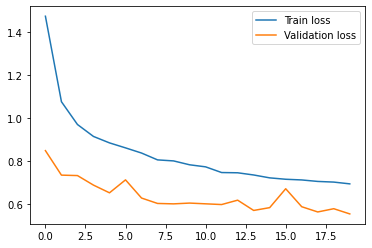

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

In [37]:
print("Loss, Accuracy = ", model_3.evaluate(X_test, y_test, verbose=0))

Loss, Accuracy =  [0.5750320553779602, 0.7878000140190125]


Такую сетку надо учить подольше. В этой тетрадке она реализована просто как пример аугментации данных. Побиться за реальное улучшение качества вам надо будет в большой домашке по картинкам. Там будут коты и собаки (неожиданно...) 